In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import folium # map rendering library

                                                                2nd Project start2impact - Data Science - Davide Miglietta

## Data Manipulation and Visualization Project: 

## Looking for Racial Bias in the Washington Post Database

### Washington Post Database

The Washington Post's database contains records of every fatal shooting in the United States by a police officer in the line of duty since Jan. 1, 2015.

## Scope of the Analysis

The scope of this analysis is to find if -from data containing information about people killed by the US Police from 2015 to present- emerges some kind of racial bias.

## Table of contents:
1. [The WP Dataset](#1)    
    * [Dataset Exploration](#1.1)        
    * [Dataset Manipulation](#1.2)        
    * [Other Operations before the analysis](#1.3)    
        
        
2. [WP Dataset Visualization](#2)
    
    * [Victims Insights](#2.1)
        - [Victims race % vs race % on total population](#2.1.1)
        - [Victims age distribution by race](#2.1.2)
        - [Other information: gender and mental state](#2.1.3)
        - [Function Definition: horizontal bar charts by race](#2.1.4)
        - [Mental state by race](#2.1.5)
         
    * [How the fatal shooting happened?](#2.2)
        - [Victims were armed?](#2.2.1)
        - [Victim Behaviour against Police](#2.2.2)
        - [Police behaviour](#2.2.3)
           
    * [Fatal shootings over the years](#2.3)
        - [Yearly evolution of the killings](#2.3.1)
            
    * [Geographical Insights](#2.4)
        - [Map of shooting locations on US territory](#2.4.1)
        - [Main states for number of victims](#2.4.2)
        - [Function Defintion: STACKED BAR CHARTS](#2.4.3)
        - [Main states for number of victims: STACKED BAR CHARTS](#2.4.4)
        - [Main cities for number of victims](#2.4.5)
        - [Main cities for number of victims: STACKED BAR CHARTS](#2.4.6)
        - [STACKED BAR CHARTS: OPTION 2](#2.4.7)
                       
        
3. [Fatal Shootings Race Index](#3)
    * [Combination with demographc information](#3.1)
    * [Index calcluation](#3.2)
    * [Index representation](#3.3)
        - [Cities Index Heatmapy](#3.1)
        - [States Index Heatmap](#3.2)
    * [US Choropleth map](#3.4)
    
    
4. [Conclusions](#Conclusions)


## 1

## The WP Dataset

From https://github.com/washingtonpost/data-police-shootings/blob/master/README.md it is possible to get complete information about the dataset.

#### Features contained in the dataset are:

* **id:** a unique identifier for each victim

    
* **name**: name of the victim

    
* **date:** date of the fatal shooting (YYYY-MM-DD)

    
* **manner_of_death:**
    * **shot**
    * **shot and Tasered**
    
    
* **armed:** indicates if the victim was armed
    * **undetermined:** it is not known whether or not the victim had a weapon
    * **unknown:** the victim was armed, but it is not known what the object was
    * **unarmed:** the victim was not armed

        
* **age:** age of the victim

    
* **gender:** gender of the victim
    * **M:** Male
    * **F:** Female
    * **None:** unknown

        
* **race:**
    * **W:** White, non-Hispanic
    * **B:** Black, non-Hispanic
    * **A:** Asian
    * **N:** Native American
    * **H:** Hispanic
    * **O:** Other
    * **None:** unknown

        
* **city:** municipality of the fatal shooting

    
* **state:** two-letter postal code abbreviation

    
* **signs_of_mental_illness:** News reports have indicated the victim had a history of mental health issues, expressed suicidal intentions or was experiencing mental distress at the time of the shooting.

    
* **threat_level:**
    * **Attack:** most direct and immediate threat to life. That would include incidents where officers or others were shot at, threatened with a gun etc.
    * **Other:** includes many incidents where officers or others faced significant threats
    * **Undetermined**

    
* **flee:** News reports have indicated the victim was moving away from officers
    * **Foot**
    * **Car**
    * **Not fleeing**

    
*Note that:
The threat column and the fleeing column are not necessarily related. For example, there is an incident in which the suspect is fleeing and at the same time turns to fire at gun at the officer. Also, attacks represent a status immediately before fatal shots by police while fleeing could begin slightly earlier and involve a chase.*


* **body_camera:** News reports have indicated an officer was wearing a body camera and it may have recorded some portion of the incident.

    
* **latitude and longitude:** the location of the shooting (precision of about 80-100 meters)

    
* **is_geocoding_exact:** accuracy of the coordinates
    * **True:** oordinates are for the location of the shooting
    * **False:** coordinates are for the centroid of a larger region (such as city or county)

### 1.1

### Dataset Exploration

In [2]:
#import WP database directly from the URL, to get updated version

url = 'https://raw.githubusercontent.com/washingtonpost/data-police-shootings/master/fatal-police-shootings-data.csv'
df = pd.read_csv(url)

#if problems occur use the following
#df = pd.read_csv('fatal-police-shootings-data.csv') #last download june 8th 2021
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True


In [3]:
#showing dataset information

print(df.shape)
print('*************************************************************************************')
print(df.columns)
print('*************************************************************************************')
print(df.info())
print('*************************************************************************************')
print(df.isnull().sum())


(6341, 17)
*************************************************************************************
Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera', 'longitude', 'latitude', 'is_geocoding_exact'],
      dtype='object')
*************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6341 entries, 0 to 6340
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       6341 non-null   int64  
 1   name                     6106 non-null   object 
 2   date                     6341 non-null   object 
 3   manner_of_death          6341 non-null   object 
 4   armed                    6133 non-null   object 
 5   age                      6058 non-null   float64
 6   gender                  

In [4]:
#describe column, by column

for column in df.columns:
    print(column, '\n')
    print(df[column].describe())
    print('********************************')

id 

count    6341.000000
mean     3513.060716
std      1982.441663
min         3.000000
25%      1793.000000
50%      3522.000000
75%      5238.000000
max      6915.000000
Name: id, dtype: float64
********************************
name 

count                6106
unique               6088
top       Michael Johnson
freq                    3
Name: name, dtype: object
********************************
date 

count           6341
unique          2175
top       2018-04-01
freq               9
Name: date, dtype: object
********************************
manner_of_death 

count     6341
unique       2
top       shot
freq      6017
Name: manner_of_death, dtype: object
********************************
armed 

count     6133
unique      99
top        gun
freq      3647
Name: armed, dtype: object
********************************
age 

count    6058.000000
mean       37.091449
std        13.004383
min         6.000000
25%        27.000000
50%        35.000000
75%        45.000000
max        91.000000

### 1.2

### Dataset Manipulation

In this section, some manipulation is performed on the dataset, for an easier use in the analysis and representation.

In [5]:
#null values in 'race' are substituted with 'U' ('Unkown')

print(df['race'].isnull().sum())
df['race'].fillna('U', inplace = True)
print(df['race'].isnull().sum())

#abbreviations are substitued with whole words for more understandable plots labels

races_dict = {'W':'White', 'B':'Black', 'H': 'Hispanic', 'A':'Asian', 'N':'Native', 'O': 'Other', 'U': 'Unkown' }

df['race'] = df['race'].apply(lambda x: races_dict[x])
print(df['race'].value_counts())

628
0
White       2897
Black       1517
Hispanic    1060
Unkown       628
Asian        104
Native        88
Other         47
Name: race, dtype: int64


In [6]:
#again, for more understandable plots labels:

yes_no_dict = {True: 'Yes', False: 'No'}
df.replace(yes_no_dict, inplace = True)

states_dict = {"AL":"Alabama","AK":"Alaska","AZ":"Arizona","AR":"Arkansas","CA":"California","CO":"Colorado","CT":"Connecticut","DE":"Delaware","FL":"Florida","GA":"Georgia","HI":"Hawaii","ID":"Idaho","IL":"Illinois","IN":"Indiana","IA":"Iowa","KS":"Kansas","KY":"Kentucky","LA":"Louisiana","ME":"Maine","MD":"Maryland","MA":"Massachusetts","MI":"Michigan","MN":"Minnesota","MS":"Mississippi","MO":"Missouri","MT":"Montana","NE":"Nebraska","NV":"Nevada","NH":"New Hampshire","NJ":"New Jersey","NM":"New Mexico","NY":"New York","NC":"North Carolina","ND":"North Dakota","OH":"Ohio","OK":"Oklahoma","OR":"Oregon","PA":"Pennsylvania","RI":"Rhode Island","SC":"South Carolina","SD":"South Dakota","TN":"Tennessee","TX":"Texas","UT":"Utah","VT":"Vermont","VA":"Virginia","WA":"Washington","WV":"West Virginia","WI":"Wisconsin","WY":"Wyoming"}
df.replace(states_dict, inplace = True)

df.head(2)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,Washington,Yes,attack,Not fleeing,No,-123.122,47.247,Yes
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,Oregon,No,attack,Not fleeing,No,-122.892,45.487,Yes


In [7]:
#null values in 'armed' and 'flee' are filled with 'Unkown' to let them appear in the plots
df['armed'].fillna('Unkown', inplace = True)
df['flee'].fillna('Unkown', inplace = True)

### 1.3

### Other Operations before the analysis

Data for the different races are separated in different dataframes and then, saved in a list. 
This will simplify iterations in various part of the analysis, especially for plotting.

In [8]:
all_races = []

for value in races_dict.values():
    
    '''print('Race:                       ', value)
    print('Corresponding Dataframe:    ', str(value).lower() + 's', '\n')'''
    
    #creating a global variable with the name of the race + 's'
    #then assigning to it the df subset corresponding to the race
    globals()[str(value).lower() + 's'] = df[df['race'] == value].copy()
    
    #creating a list cointaing the new dataframes
    all_races.append(globals()[str(value).lower() + 's'])

    
'''
The created dataframes are:

whites
blacks
hispanics
asians
natives
unkowns
others'''

'\nThe created dataframes are:\n\nwhites\nblacks\nhispanics\nasians\nnatives\nunkowns\nothers'

The following dictionary is created for having a correspondance within races and colors.

In this way, all plots of this analysis will present the same color scale (for instance race: white --> color: blue).

In [9]:
#chosen color scale is tableu scale

print('Colors: ', list(colors.TABLEAU_COLORS.keys()))
print('Coding: ', list(colors.TABLEAU_COLORS.values()))

tableu_colors = list(colors.TABLEAU_COLORS.values())

color_dict = {}

for race, color in zip(races_dict.values(), tableu_colors):
    color_dict[race] = color
    
color_dict

Colors:  ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
Coding:  ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


{'White': '#1f77b4',
 'Black': '#ff7f0e',
 'Hispanic': '#2ca02c',
 'Asian': '#d62728',
 'Native': '#9467bd',
 'Other': '#8c564b',
 'Unkown': '#e377c2'}

Setting equal styles for seaborn and matplotlib for coherent visualization while using the two libraries:

In [10]:
sns.set_theme(style = 'white')
plt.style.use('seaborn-white')

## 2

## WP Dataset Visualization

### 2.1

### Victims Insights

#### In the first section we'll analyze information about the victims.

The following function counts the various element of a column and calculate the fraction on the total.

In [11]:
def calc_share(dataframe, column):
    counts = dataframe[column].value_counts(ascending=True).tolist()
    indexes = dataframe[column].value_counts(ascending=True).index.tolist()
    shares = [i / sum(counts) for i in counts]
    return (counts, indexes, shares)

In [12]:
'''The calc_share function is applied to calculate the counts of killed people by race and the fraction on the total.
The function returns also the indexes (that, in this case, correspond to the races theirself)'''

race_counts, races, share_races = calc_share(df, 'race')

'''
At https://www.census.gov/quickfacts/fact/table/US/PST045219 it is possible to find the following information,
on total US population:

Black or African American                   13,40% (Black)
American Indian and Alaska Native            1,30% (Native)
Asian                                        5,90% (Asian)
Native Hawaiian and Other Pacific Islander   0,20% (Other)
Hispanic or Latino                          18,50% (Hispanic)
White, not Hispanic or Latino               60,10% (White)

This is saved in 'share_population', following the same order of the list 'races' (adding 0 for'Unkown').
This will be used to compare the percentage of victims by race and the effective race percentage on US population.
'''
print(races)
share_population = [0.002, 0.013, 0.059, 0, 0.185, 0.134, 0.601]
print(share_population)

['Other', 'Native', 'Asian', 'Unkown', 'Hispanic', 'Black', 'White']
[0.002, 0.013, 0.059, 0, 0.185, 0.134, 0.601]


#### 2.1.1

#### Victims race % vs race % on total population

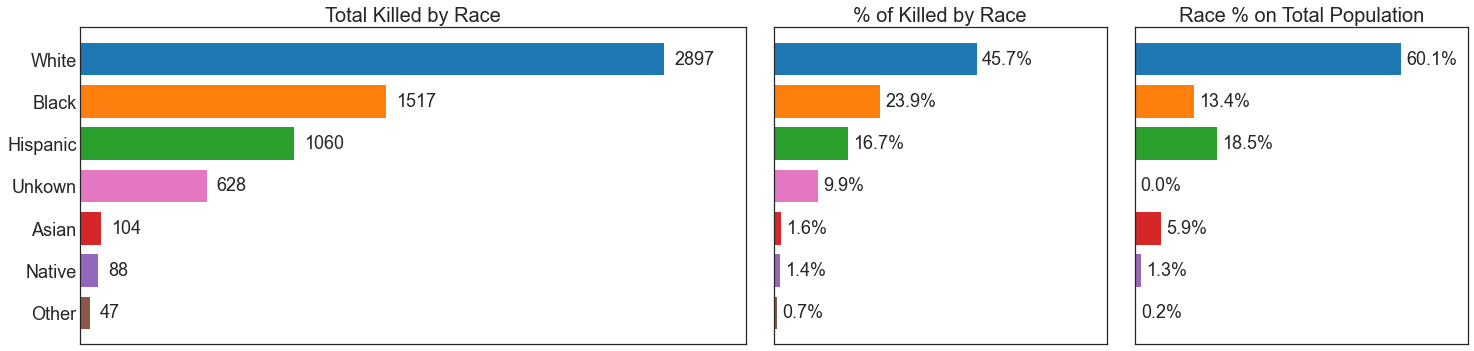

In [13]:
'''For other visualizations will not be necessary, but in this case a specific color map
should be created'''
cmap = []
for race in races:
    cmap.append(color_dict[race])

#figure with three horizontal bars
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (20,5), sharey=True, gridspec_kw={'width_ratios': (.5, .25, .25)})
fig.tight_layout()

hbar_1 = ax1.barh(races, race_counts, color=cmap)
hbar_2 = ax2.barh(races, share_races, color=cmap)
hbar_3 = ax3.barh(races, share_population, color=cmap)  

#setting bars labels
ax1.bar_label(hbar_1, size=18, padding=10)
ax2.bar_label(hbar_2, size=18, padding=5, labels=['{:.1%}'.format(i) for i in share_races])
ax3.bar_label(hbar_3, size=18, padding=5, labels=['{:.1%}'.format(i) for i in share_population])

# adjust xlim to fit labels
ax1.set_xlim(right=3300)  
ax2.set_xlim(right=0.75)
ax3.set_xlim(right=0.75)

#increasing size of y_ticks
ax1.tick_params(axis='y', labelsize=18)

#clearing x_ticks
ax1.set_xticks([])
ax2.set_xticks([])
ax3.set_xticks([])

#setting titles
ax1.set_title('Total Killed by Race', size=20)
ax2.set_title('% of Killed by Race', size=20)
ax3.set_title('Race % on Total Population', size=20)

plt.show()

* In absolut terms **white** people see the bigger number of victims. 
However, in relative terms: on total population, they represent the 60.1 %, while only 45.7 % of the victims.

* **Asians** pass from 5.9 % to 1.6 %

* On the opposite side, **blacks** are 13.4 % of total population, but 24 % of the victims. It almost a doubling.

* **Other races** don't really seem to show  big differences

* **Unkown** race is a considerable percentage of the victims (9.8 %) and it could be an important insight too.

In [14]:
#df[df['race'] == 'Unkown']

#### 2.1.2

#### Victims age distribution by race

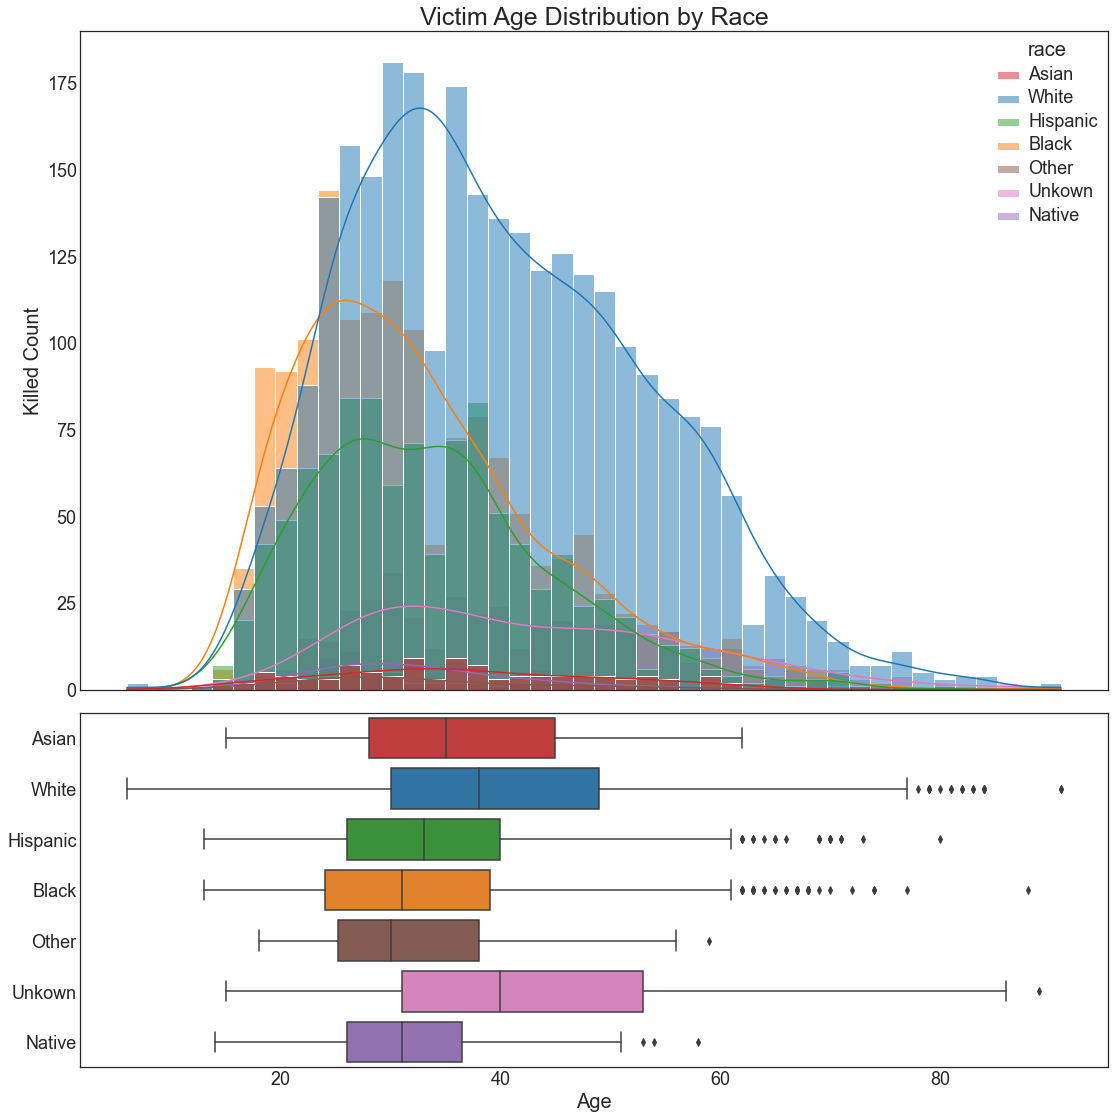

In [15]:
#two plots: age distribution (by race) and corresponding boxplots below

fig, (ax1, ax2) = plt.subplots(2,1,figsize = (15,15), sharex=True,
                         gridspec_kw={'height_ratios': (.65, .35)})
fig.tight_layout()

sns.histplot(data = df, x =  'age', hue = 'race', kde=True, palette = color_dict, ax = ax1)
sns.boxplot(data = df, x = 'age', y = 'race', orient = 'h', palette = color_dict, ax = ax2)

#setting titles and adjusting labels
ax1.set_title('Victim Age Distribution by Race', size=25)
ax1.set_ylabel('Killed Count', size=20)
ax1.tick_params(axis ='y', labelsize=18)

ax2.set_xlabel('Age', size=20)
ax2.set_ylabel(None)
ax2.tick_params(axis ='both', labelsize=18)

#increase legend size
'''qua non ho capito perchè, ma non riesco a cambiare la legenda con ax.legend o plt.legend'''
plt.setp(ax1.get_legend().get_title(), fontsize='20') # for legend title
plt.setp(ax1.get_legend().get_texts(), fontsize='18') # for legend text

plt.show()

This graph clearly show that the median age of the victims is generally lower for minorities than for the white majority.
This is especially true for blacks and natives.

#### 2.1.3

#### Other information: gender and mental state

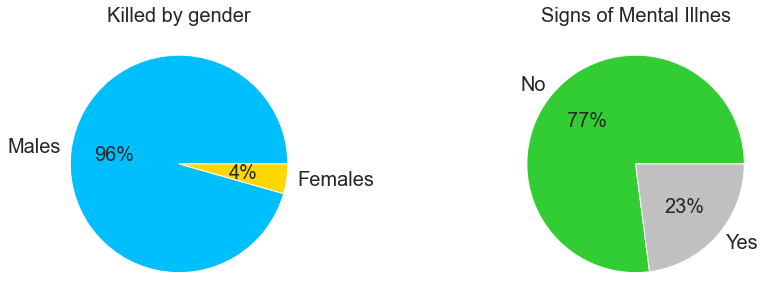

In [16]:
#ploting information about gender and mental state

fig, (ax1, ax2) =  plt.subplots(1,2, figsize = (15,5))

#setting labels and colors
labels_1 = ['Males', 'Females']
colors_1 = ['deepskyblue', 'gold']

#plotting a pie chart with percentages superimpose
ax1.pie(df['gender'].value_counts(), colors=colors_1, labels = labels_1, autopct='%.0f%%', textprops={'fontsize': 20})
ax1.set_title('Killed by gender', size=20)

#setting labels and colors
labels_2 = ['No', 'Yes']
colors_2 = ['limegreen', 'silver']

#plotting a pie chart with percentages superimpose
ax2.pie(df['signs_of_mental_illness'].value_counts(), colors=colors_2, labels = labels_2,  autopct='%.0f%%', textprops={'fontsize': 20})
ax2.set_title('Signs of Mental Illnes', size=20)

plt.show()

#### Gender
As it was seen from the dataset, males are the big majority of the victims, so it doesn't worth to explore this more.

#### Mental state
Almost a quarter of the victims presented signs of mental illness. In those cases may have been for the police harder to deal with the victim and shooting could have been unavoidable. 
This is, of course, only a supposition. However, considering the non-negligible amount of people with signs of mental illness, it will be considered in the following plots, breaking this information for the various races.

#### 2.1.4

#### Function Definition: horizontal bar charts by race
Since the following visualization will be used more than one time in this analysis, the following function (plot_bars) is defined. It cover a more general case, in which more than one feature could be passed.

The arguments of the function are:
* **all_races:** list of dataframes
* **color_dict:** where keys are races and values are corresponding colors
* **subset:** list of features (columns) to plot
* **title** of the plot
* **x:** item limit

In [17]:
def plot_bars(all_races, color_dict, subset, title, x):
    
    #if empty variables are passed (such as subset = []), will rase an error and go out from the function
    try:
        
        
        '''Set figure dimension and number of subplots relative to the number of
        features (len(subset)) chosen and the number of races in the dataset.
        Note that the keys of color_dict correspond to the races.'''
        
        fig, axes =  plt.subplots(len(color_dict),len(subset), sharex=True,figsize = (len(subset) * 8, len(color_dict) * 3))
        fig.tight_layout(pad=2) 
        
        
        '''Cases with one feature and more than one, should be treated in a slighlty different way'''
        
        if len(subset) == 1:

            #iterating over the list of dataframes (all_races) and the items (keys and values) of the 'color_dict'
            for df_race, ax, (race, color) in zip(all_races, axes.flat, color_dict.items()):

                '''applying the 'calc_share' function, to return:
                c (counts), j (indexes - races) and s (shares) of the feature
                similarly as done before'''

                c, j, s = calc_share(df_race, subset[0])
                
                
                '''In case of to many items, bars can result diffcult to read so,
                we keep only x items, if the limit is exceeded.'''
                
                if len(j) > x:
                    s, j = s[-x:], j[-x:]
                    
                    
                '''Horizontal bar chart, corresponding to a race, is plot on the current ax 
                (for every iteration: one race that correspond to one ax).'''
                
                hbar = ax.barh(j, s, height = 0.5, color=color)
                ax.bar_label(hbar, size=18, padding=5, labels=['{:.1%}'.format(a) for a in s])  

                #subplots title and ticks
                ax.set_title(race, size=20)    
                ax.tick_params(labelsize=18, axis='y')


                
        #If the features chosen are > 1, the code is the following:        
        elif len(subset) > 1:
            
            #iteration as before
            for df_race, ax, (race, color) in zip(all_races, axes, color_dict.items()):


                '''MAIN DIFFERENCE WITH 'case1':
                In this case, we are also iterating over the subset:
                
                to get the feature of the subset and an index (0, 1, ...)
                that will be used to know where to plot the bar (ax[i])
                (0 is the first, 1 the second in corresponding ax, and so on)'''

                for i, feature in enumerate(subset):

                    #apply function as before
                    c, j, s = calc_share(df_race, feature)
                    
                    #items limit
                    if len(j) > x:
                        s, j = s[-x:], j[-x:]
                        
                    
                    '''HEADS ON:
                    Note that it is not only 'ax' as before but 'ax[i]':
                    
                    In case of two features for example: 
                    - the first is plot in ax [0]
                    -the second in ax [1]'''
                    
                    #horizontal bars
                    hbar = ax[i].barh(j, s, color=color)        
                    ax[i].bar_label(hbar, size=18, padding=5, labels=['{:.1%}'.format(a) for a in s])

                    #setting tick parameters on y axis
                    ax[i].tick_params(labelsize=18, axis='y')

                    #setting ylabels only on the left axis
                    ax[0].set_ylabel(race, size=20, rotation='horizontal', labelpad=60)
                    
                    #set title (name of the feature) only on the top axes
                    axes[0,i].set_title(feature, size = 20)


        else:
            print("Subset can't be empty")

            
        #set overall title
        overall_title = fig.suptitle(title, fontsize=25)
        overall_title.set_y(0.95)
        
        # shift subplots down
        fig.subplots_adjust(top=0.9)
        
        #setting xlim for fitting labels (1 = 100 %)
        plt.xlim(right=1)
        plt.xticks([])
        plt.show()
    
    except:
        print('Subset or other variables can not be empty')

#### 2.1.5

#### Mental state by race

A total of 7 barcharts are plotted, indicating the percentage of people, presenting signs of mental illness, by race.

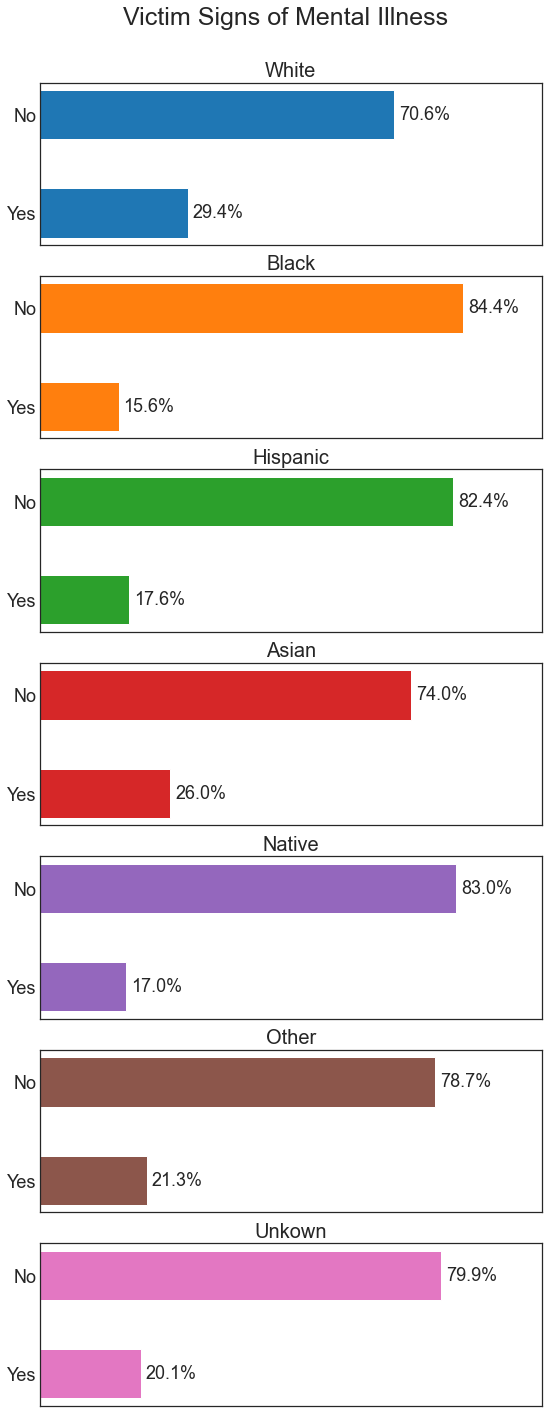

In [18]:
#defining function parameters
subset = ['signs_of_mental_illness']
title = 'Victim Signs of Mental Illness'
x = 5

#call the function
plot_bars(all_races, color_dict, subset, title, x) 

* **White** has higher percentage (+ 6 %), of victims that presented signs of mental illness, than average
* **Asian, Other and Unkown** have comparable (± 3 %) percentages
* **Native, Hispanic and Black** have lower (between - 7 % and -5 %) percentages

This could mean many things, or be just a statistical fluctuation. 
An interpretation could be that, police use different approach while dealing with minorities; using more easily fatal force, even when situations could be solved with another approach.

To dig deeper the situations of the killings, see next section.

### 2.2

### How the killings happened

In a very similar way to what done before, some features subsets are analyzied with focus on the race differences.

The following subsets, contain information about how the shooting happen. If the victim was fleeing or not, attacking the police or also, if the officer was or not wearing body camera.

#### 2.2.1

#### Victims were armed?

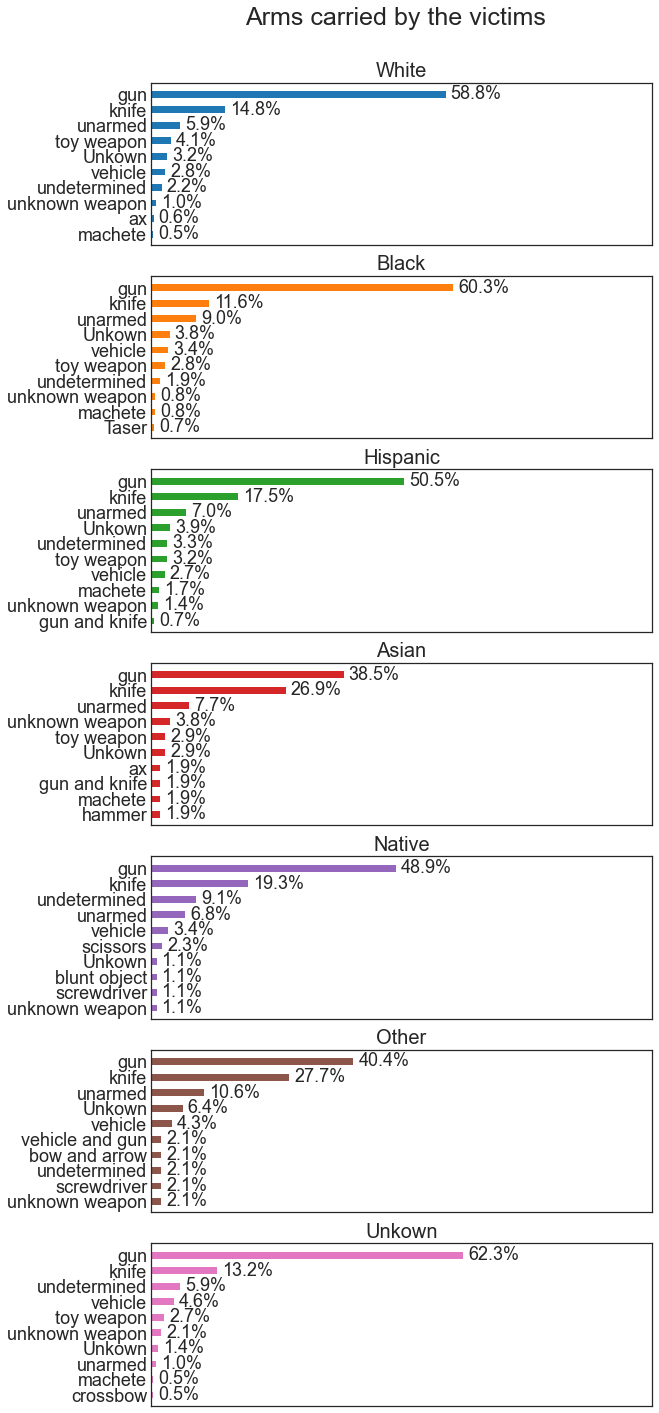

In [19]:
subset = ['armed']
title = 'Arms carried by the victims'

x = 10
plot_bars(all_races, color_dict, subset, title, x)

In the majority of cases were armed with a gun, followed by a knife. Since many weapons are present with residual percentages, we reduce the items showed (x) and plot together other features. See below.

#### 2.2.2

#### Victim Behaviour against Police

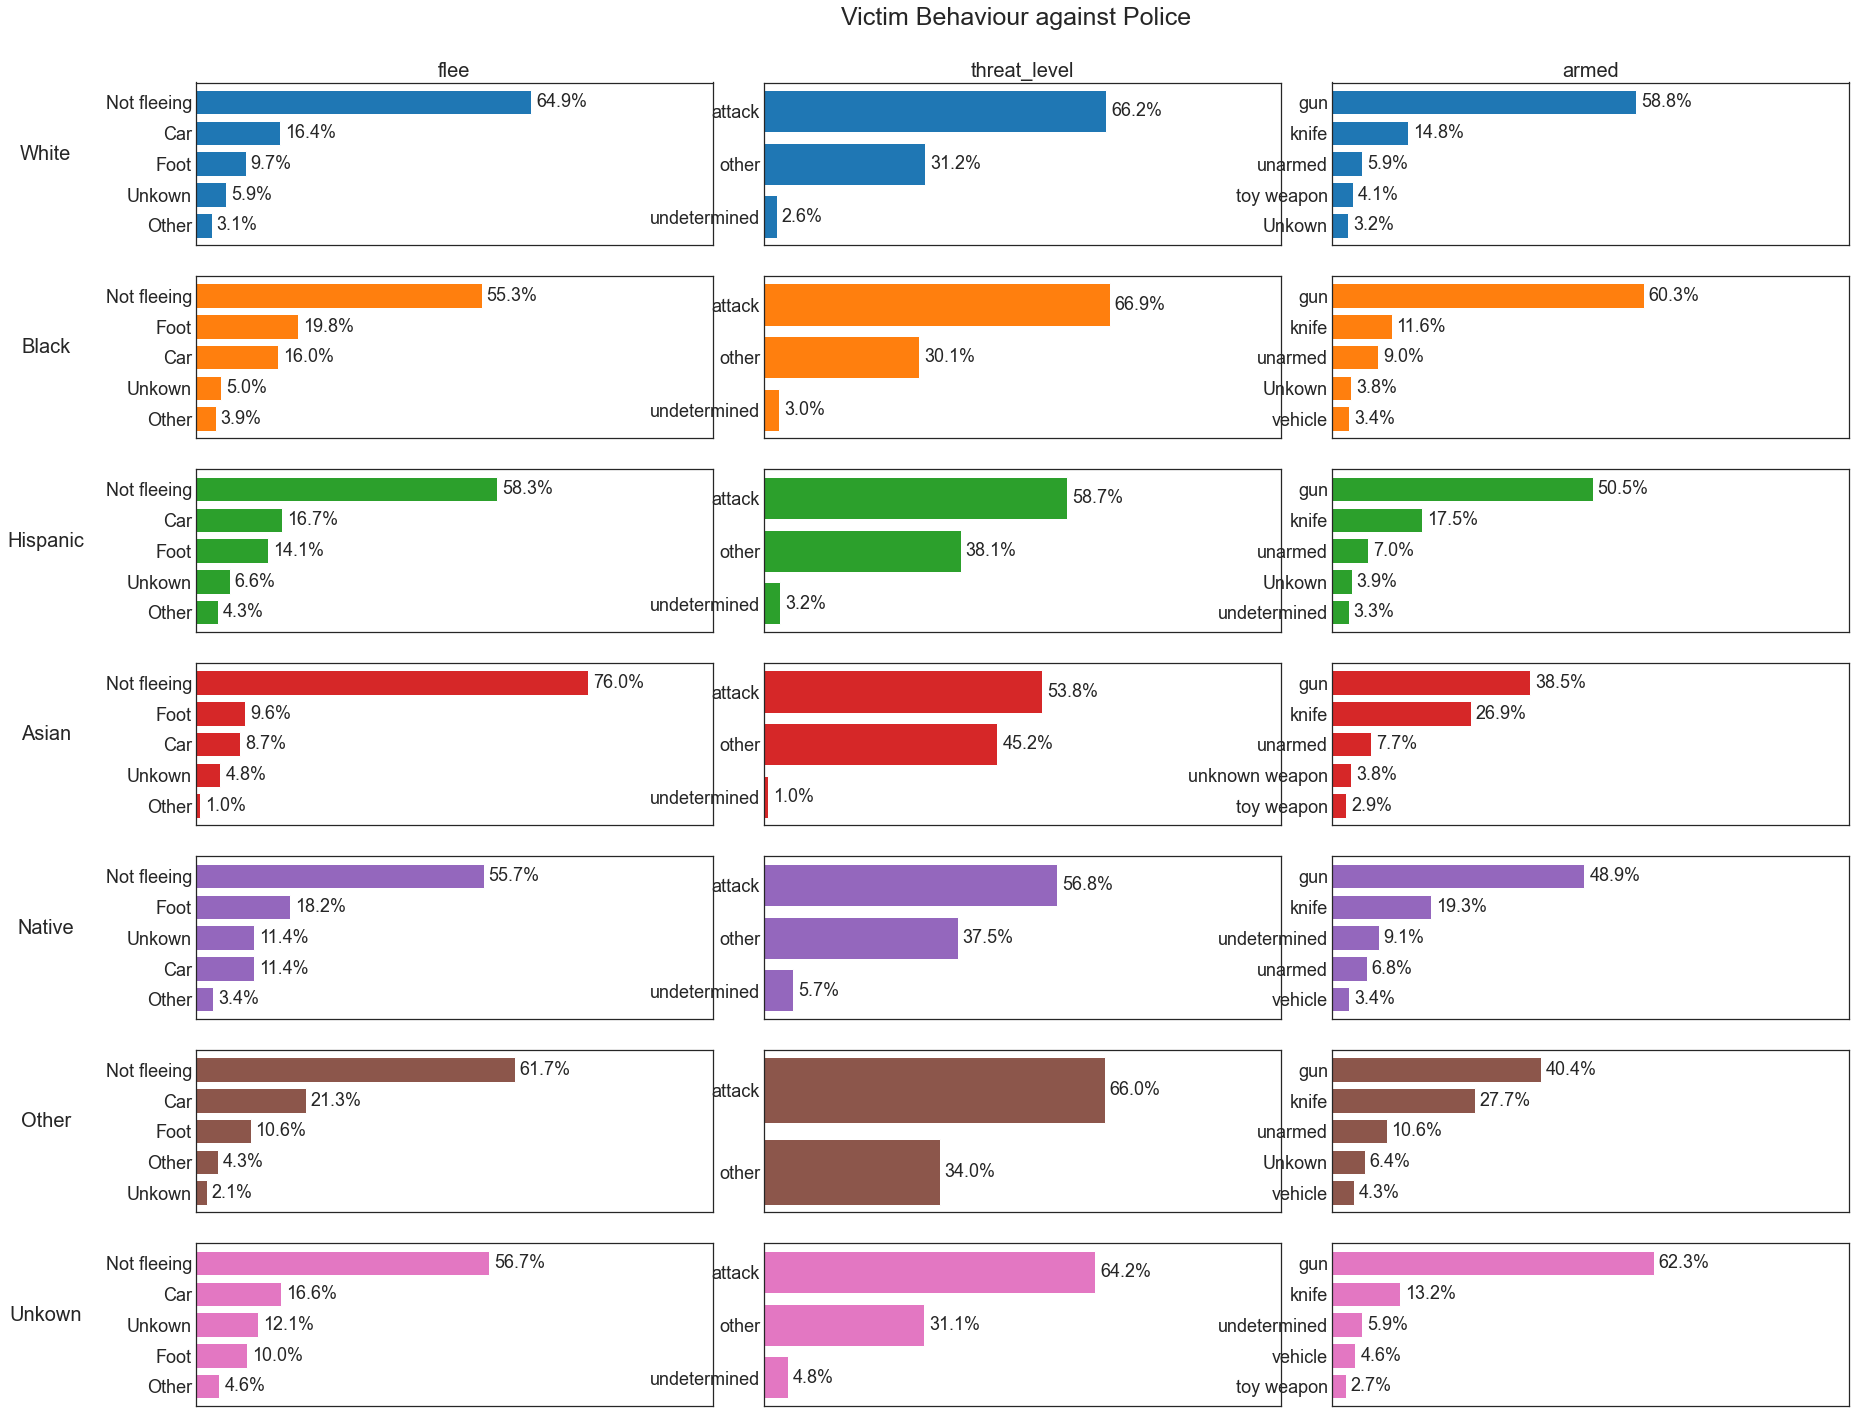

In [20]:
subset = ['flee', 'threat_level', 'armed']
#subset = ['flee', 'threat_level', 'armed', 'signs_of_mental_illness']

title = 'Victim Behaviour against Police'

x = 5
plot_bars(all_races, color_dict, subset, title, x)

Situation are similar for the various races:
* the most common situation is that the victim was not fleing away from the officers and was actually attacking them with a gun.
* no substantial differences are visible looking at the 'unarmed' bar. For all races, ita ranges between 5 and 10 %.

#### 2.2.3

#### Police behaviour

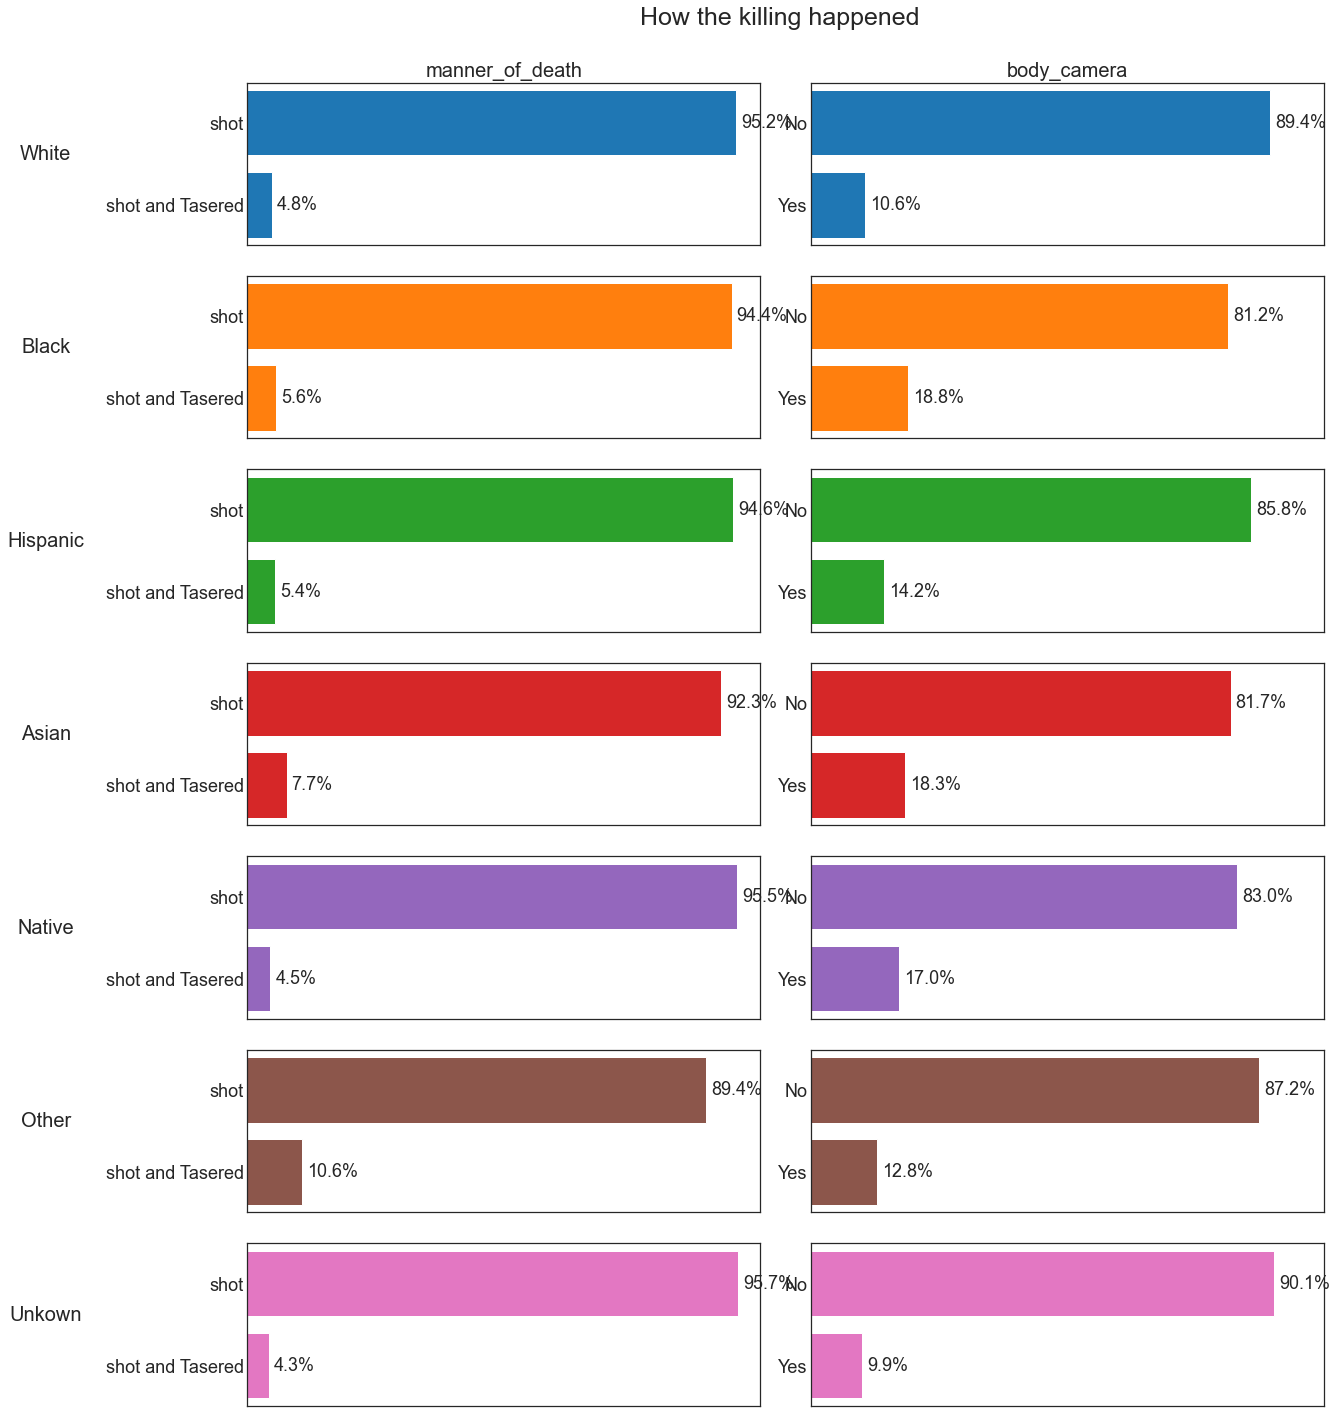

In [21]:
subset = ['manner_of_death', 'body_camera']
title = 'How the killing happened'

x = 10
plot_bars(all_races, color_dict, subset, title, x)

* In the wide majority of cases, victims were shot and not tasered, so this don't give us so much useful information.

* Could be more valuable the insights given from the bar charts on the right:
    - first of all: from 80 to 90 % of the cases, officers were not wearing body camera. This could be the first aspect in which US Police forces could work. Increasing the use of body cameras could tutelate the officers operating in the respect of the law while preventing abuses.
    - second: for blacks, in 18 % of the cases there is some kind of video documentation that could be analyzed; it is the higher percentage. Videos could be analyzed (with respect con victims provacy) since black minoritiy appear to be the most hit. 

### 2.3

### Fatal shooting over the years

Below it is shown the killing evolution from 2015 to 2020 on yearly basis (each dot correspond to the total victim of the matching year).

#### 2.3.1

#### Yearly evolution of the killings

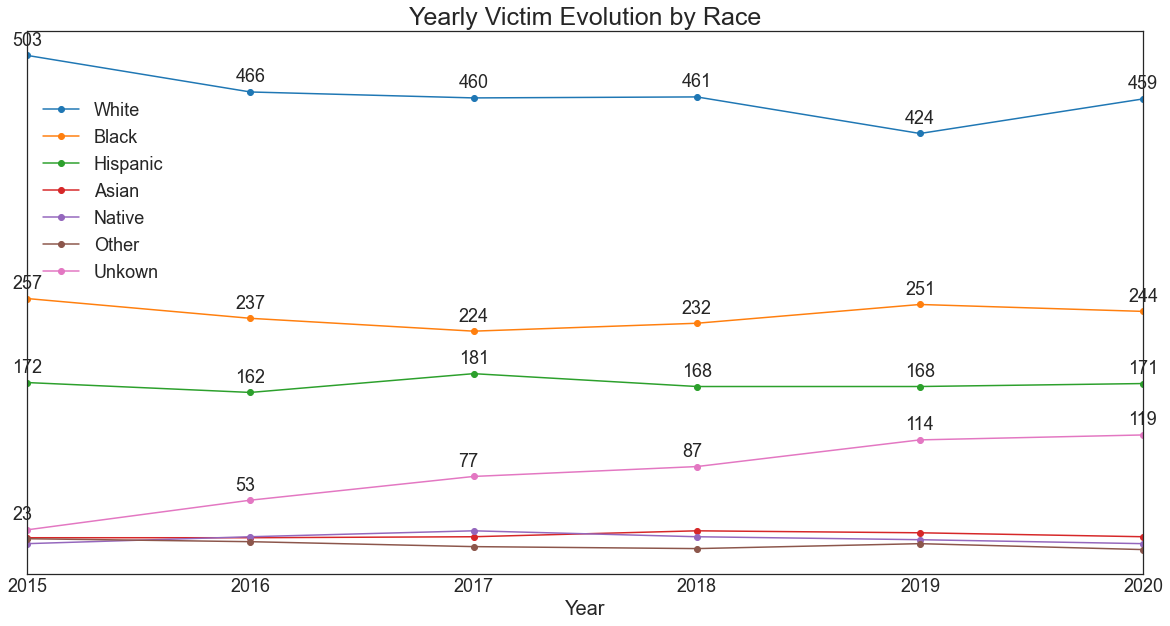

In [22]:

fig, ax = plt.subplots(figsize = (20,10))

for df_race, (race, color)  in zip(all_races, color_dict.items()):
    
    #creating a dataframe with the date of the killing as index, and 1 to mark the killing
    time_series = df_race[['date']].copy()
    time_series['kill'] = 1
    
    #dates manipulation
    time_series['date'] = pd.to_datetime(time_series['date'], yearfirst=True)
    time_series=time_series.set_index('date')
    
    #resampling the data with year aggregation (up to 2020, since 2021 is incomplete)
    values = time_series['kill'][: '2020'].resample('Y').sum()
    
    #lineplot
    values.plot(color = color, label = race, marker='o')
    
    #labelling only the more represented race (for readability)
    if race in ['White', 'Black', 'Hispanic', 'Unkown']:
        for i, v in values.items():
            ax.annotate(str(v), xy=(i,v), xytext=(-15,10), textcoords='offset points', size=18)

plt.title('Yearly Victim Evolution by Race', size = 25)
plt.xlabel('Year', size=20) 
plt.xticks(size=18)

plt.yticks([])   
plt.legend(bbox_to_anchor = (0., 0.4, 0.5, 0.5), fontsize = 18) #bbox_to_anchor(x, y, width, height)
plt.show()


In [23]:
print(unkowns[unkowns['date'] > '2021'].shape[0])

unkowns[unkowns['date'] > '2021'].head(2)

155


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
5950,6483,Isaac Matheny,2021-01-01,shot,toy weapon,37.0,M,Unkown,Valley Falls,Oregon,No,other,Unkown,No,-120.282,42.484,Yes
5956,6509,Michael Romo,2021-01-04,shot,knife,28.0,M,Unkown,Payson,Arizona,No,other,Not fleeing,No,-111.321,34.245,Yes


* For **White:** the number of killing is slightly decreasing along the years.

* For other **Minorities:** it seems to remain stable.


* What is really interesting from this plot is the constant increasing of **Unkowns**. Moreover, in 2021 (last update june 9th) **the number of Unkowns is 146**. More than all the ones in the whole 2020.

**What does it mean?** For sure it could worth some investigation.
For example, is it a worsening in the data collcting?
Many of the Unkowns are whites? It could explain the gap between % on total population and on the victims?
The majority of the Unkowns are blacks? It could increase more the shown gap. If the case, is the police omitting to comunicate the race on purpose?
Other motivations?

Answering to those questions could help doing a better analysis.


### 2.4

### Geographical Insights

#### Plot geographic information of the killing crossed with race of the victim:

For this analysis we'll use Nominatim from geopy.geocoders and folium. The goal is to plot a US map with a marker indicating the location of the shot and a different color for the race of the victim.

In [24]:
df.head(2)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,Washington,Yes,attack,Not fleeing,No,-123.122,47.247,Yes
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,Oregon,No,attack,Not fleeing,No,-122.892,45.487,Yes


In [25]:
#creating a df_geo with only geographic information
df_geo = df[['date', 'race', 'latitude', 'longitude']].copy()

#it is not possible to plot null values, so we drop them
print(df_geo.isnull().sum())

df_geo.dropna(inplace=True)

print(df_geo.isnull().sum())

df_geo.head(2)

date           0
race           0
latitude     307
longitude    307
dtype: int64
date         0
race         0
latitude     0
longitude    0
dtype: int64


,date,race,latitude,longitude
0,2015-01-02,Asian,47.247,-123.122
1,2015-01-02,White,45.487,-122.892


#### 2.4.1

#### Map of shooting locations on US territory

In [26]:
'''Since the code take some minutes to run, it has been commented out. 
To access the interactive map, just click the below html link
or uncomment the cell below.'''

'Since the code take some minutes to run, it has been commented out. \nTo access the interactive map, just click the below html link\nor uncomment the cell below.'

<a href='map_killing_usa.html'>+++++ MAP: Killings Distribution on US territory+++++</a>
    
Note that the dot colors follow the color maps of the previous visualizations (green for hispanics, red for asians and so on)
    

In [27]:
'''#setting initial coordinates of USA for initializing the map (got with Nominatim)

address = 'United States of America'

geolocator = Nominatim(user_agent="MI_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of USA are {}, {}.'.format(latitude, longitude))


# initialization of the map
map_killing_usa = folium.Map(location=[latitude, longitude], zoom_start=3)

# add markers to map
for lat, lng, race, date in zip(df_geo['latitude'], df_geo['longitude'], df_geo['race'], df_geo['date']):
    
    label = folium.Popup('Date: {},\nRace: {}'.format(date, race), parse_html=True)
    
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color=color_dict[race],
        fill=True,
        fill_color=color_dict[race],
        fill_opacity=1,
        parse_html=False).add_to(map_killing_usa)  

map_killing_usa.save('map_killing_usa.html')    

map_killing_usa'''

'#setting initial coordinates of USA for initializing the map (got with Nominatim)\n\naddress = \'United States of America\'\n\ngeolocator = Nominatim(user_agent="MI_explorer")\nlocation = geolocator.geocode(address)\nlatitude = location.latitude\nlongitude = location.longitude\nprint(\'The geograpical coordinate of USA are {}, {}.\'.format(latitude, longitude))\n\n\n# initialization of the map\nmap_killing_usa = folium.Map(location=[latitude, longitude], zoom_start=3)\n\n# add markers to map\nfor lat, lng, race, date in zip(df_geo[\'latitude\'], df_geo[\'longitude\'], df_geo[\'race\'], df_geo[\'date\']):\n    \n    label = folium.Popup(\'Date: {},\nRace: {}\'.format(date, race), parse_html=True)\n    \n    folium.CircleMarker(\n        [lat, lng],\n        radius=3,\n        popup=label,\n        color=color_dict[race],\n        fill=True,\n        fill_color=color_dict[race],\n        fill_opacity=1,\n        parse_html=False).add_to(map_killing_usa)  \n\nmap_killing_usa.save(\'map_k

#### Exploring the map, many interesting insights come out:
* Blue dots (white victims) are the most numerous, but the majority are sparse along the whole territory
* Orange clusters (black victims): are clearly visible in many big cities of the east (from the east cost the center of the countries). In cities like New York, Atlanta, Chicago, Washington, Cleveland, New Orleans or St. Louis, blacks are the big majority of the victims.
* Hispanic victims (green dots) are concetrated in the states closer to Mexico (where hispanic people presence is higher).
* Many Unkowns are conctrated in California (especially Los Angeles), Miami and Houston
* In the central states (such as Colorado, South and North Dakota) the share of native victims is not negligible.

#### 2.4.2

#### Main states for number of victims

The next visualization shows stacked bar charts of the total number of victims (divided by race), for the states with the higher number of victims.

#### Before, some preparatory operations should be done:

In [28]:
'''First, we create some variables - for each race - containing victim counts, 
organized on the 'global graduatory''' 

"First, we create some variables - for each race - containing victim counts, \norganized on the 'global graduatory"

In [29]:
#x = 20 #How many states do you want to show?

states = df['state'].value_counts(ascending=True) #global counts of all states and all races
st = states.index #'global graduatory'

l_s = []

#creating separate counts for each race and re-organizing the order following the global graduatory
#re-indexing according to states.index
for dataframe, race in zip(all_races, races_dict.values()):
    globals()[str(race).lower() + '_state_counts'] = dataframe['state'].value_counts().reindex(states.index)
    globals()[str(race).lower() + '_state_counts'].fillna(0, inplace = True)
    
    '''
    Obtaining the folowing:
    
    white_state_counts
    black_state_counts
    hispanic_state_counts
    asian_state_counts
    native_state_counts
    other_state_counts
    unkown_state_counts'''
    
    #of interest is the counts and for easier visualization a shorte name of the variable is assigned
    globals()[str(race)[0].lower() + '_s'] = globals()[str(race).lower() + '_state_counts'].values
    

    '''
    Obtaining the victims counts, order following the index of states, for each race:
    
    w_s = white_state_counts.values
    b_s = black_state_counts.values
    h_s = hispanic_state_counts.values
    a_s = asian_state_counts.values
    n_s = native_state_counts.values
    o_s = other_state_counts.values
    u_s = unkown_state_counts.values'''
    
    #the previous lists are saved in a list, for later iteration
    l_s.append(globals()[str(race)[0].lower() + '_s'])
    
    '''Similar to do:
    l_s = [w_s[-x:], b_s[-x:], h_s[-x:], a_s[-x:], n_s[-x:], o_s[-x:], u_s[-x:]]'''


#### 2.4.3

#### Function Defintion: STACKED BAR CHARTS

In [30]:
def stacked_bars(counts_list, color_dict, indexes, x, title):

    # height of the bars
    height=0.75

    #offset where to plot each bar, starting in zero
    offset = [0] * x #
    
    #adjust the number of items to plot
    indexes = indexes[-x:]
    
    fig, ax = plt.subplots(figsize=(15,x/2))

    #plot the bars
    for counts, color in zip(counts_list, color_dict.values()):
        
        counts = counts[-x:] #set equal number of counts to the num of indexes
        
        #plot hbar and labels
        hbar = ax.barh(indexes, counts, height, left = offset, color = color)
        offset = offset + counts
        ax.bar_label(hbar, size=15, label_type='center')
        
        #adjust y ticks
        ax.tick_params(labelsize=18, axis='y')
        
    plt.xticks([])
    plt.title(title, size=25)
    plt.show()

#### 2.4.4

#### Main states for number of victims: STACKED BAR CHARTS

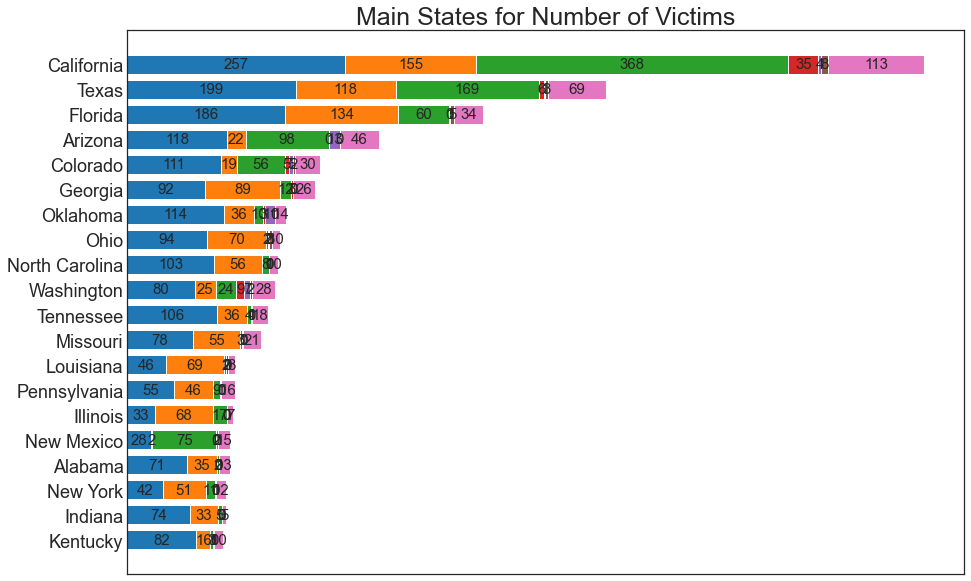

In [31]:
#top20 states by deads

stacked_bars(l_s, color_dict, st, 20, 'Main States for Number of Victims')

In the first 6 states for number of victims (from California to Georgia), the race share is different from the overall average. In fact, in those cities, more than half of the victims come from minorities.

#### 2.4.5

#### Main cities for number of victims

The same work is performed on the cities, to add a level of detail.

In [32]:
cities = df['city'].value_counts(ascending=True)
c = cities.index
l_c = []

for dataframe, race in zip(all_races, races_dict.values()):
    
    globals()[str(race).lower() + '_city_counts'] = dataframe['city'].value_counts().reindex(cities.index)
    globals()[str(race).lower() + '_city_counts'].fillna(0, inplace = True)
    
    globals()[str(race)[0].lower() + '_c'] = globals()[str(race).lower() + '_city_counts'].values
    
    l_c.append(globals()[str(race)[0].lower() + '_c'])


'''
Like before it has been obtained:

**race**_city_counts
**r**_c
l_c = [....]
'''


'\nLike before it has been obtained:\n\n**race**_city_counts\n**r**_c\nl_c = [....]\n'

#### 2.4.6

#### Main cities for number of victims: STACKED BAR CHARTS

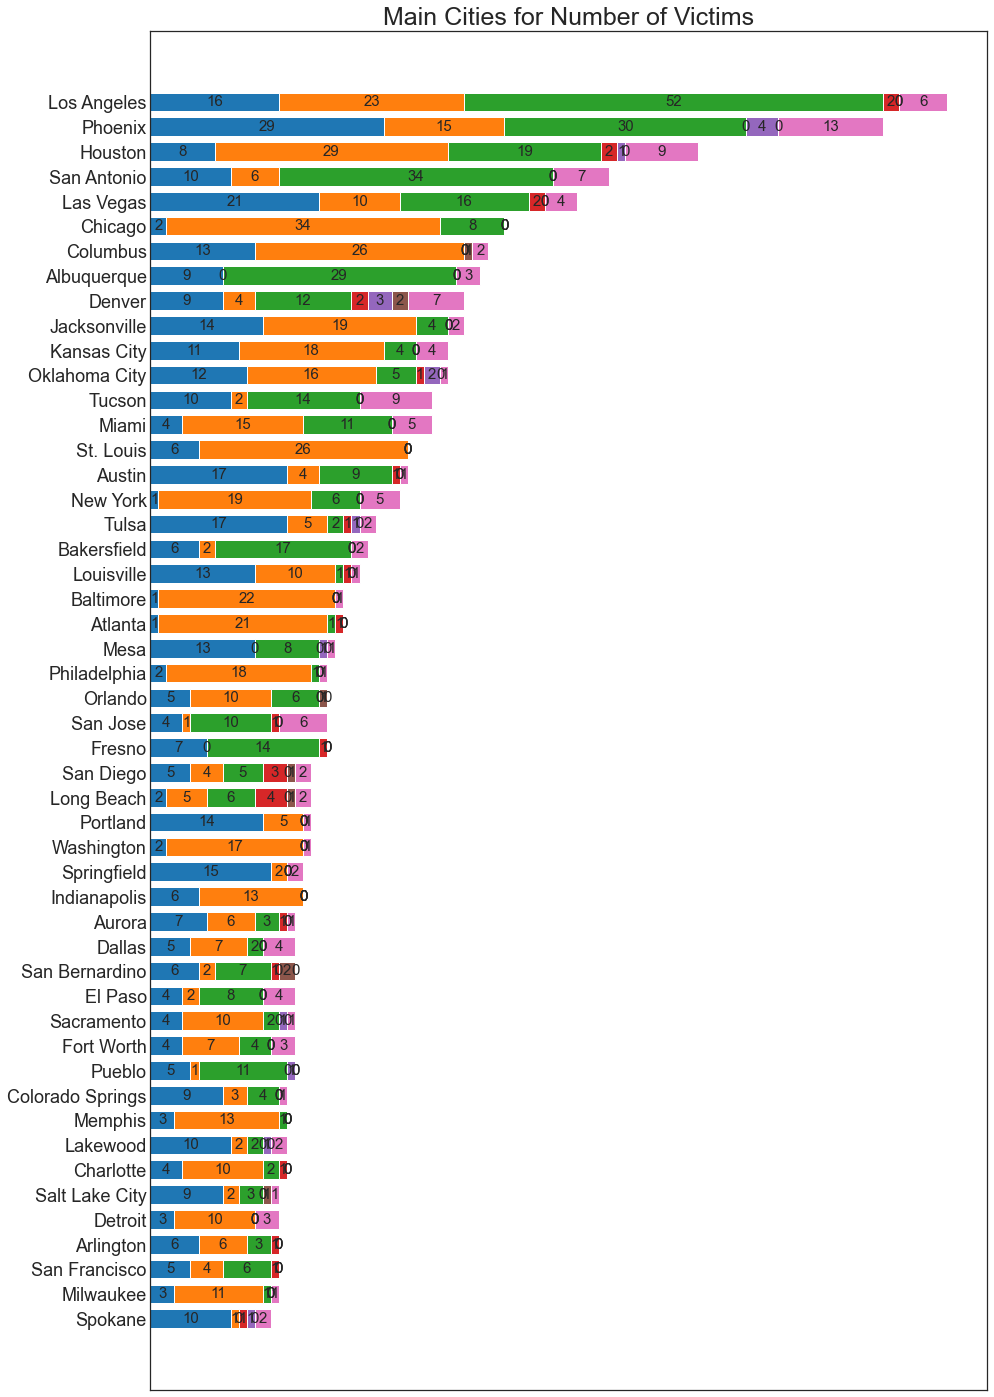

In [33]:
#top50 cities by deads

stacked_bars(l_c, color_dict, c, 50, 'Main Cities for Number of Victims')

**This confirm what observed in the previous stacked bar:**
* where the number of victim is higher: the majority of killed are minorities

**Also, what seen in the map, is described by numbers:**
* in cities like New York, Chicago (and the others cited before) the great majority of killed are blacks

**In the two cities, with the most victims -Los Angeles and Phoenix-:**
* the most represented race is Hispanic

In [34]:
'''Tra l'altro, mi sono reso conto dopo che potevo sfruttare una strategia diversa per 
plottare le stacked bar charts, manipolando i dataframe. Mi pare che la soluzione sotto sia 
anche più rapida in termini di computazione.

Lascio entrambe le versioni per il "futuro me" :)'''

'Tra l\'altro, mi sono reso conto dopo che potevo sfruttare una strategia diversa per \nplottare le stacked bar charts, manipolando i dataframe. Mi pare che la soluzione sotto sia \nanche più rapida in termini di computazione.\n\nLascio entrambe le versioni per il "futuro me" :)'

#### 2.4.7

#### STACKED BAR CHARTS: OPTION 2

Another solution is proposed to get the same bar charts. 

This solution also appear to be computationally faster.

In [35]:
'''First, we create a dataframe with only info about: state, city and race of the victim'''

killings = df [['state', 'city', 'race']].copy()
killings.head(2)

,state,city,race
0,Washington,Shelton,Asian
1,Oregon,Aloha,White


In [36]:
'''Than, we apply one-hot encoding to get 1 and 0, in new 'race' columns. 
Also, one new column is created with the total killed in the city.'''

#getting 0 and 1 corresponding to the race of the victim
killings = pd.get_dummies(killings, prefix='', prefix_sep='', columns=['race'])

killings.head(2)

,state,city,Asian,Black,Hispanic,Native,Other,Unkown,White
0,Washington,Shelton,1,0,0,0,0,0,0
1,Oregon,Aloha,0,0,0,0,0,0,1


In [37]:
#grouping by city (and state) and aggreagation function: sum
#this will return the total victims of a specific race by city

killings = killings.groupby(by=['state', 'city'], as_index = False).sum()
killings['total_killed'] = killings.sum(axis=1)


killings = killings.sort_values(by='total_killed', ascending = True).reset_index(drop = True)
#note ascending=True, for later plotting in the wanted order

'''Qua forse mi sto complicando la vita da solo, ma se non faccio così poi mi plotta 
al "contrario", la barra più corta in alto e la più lunga in basso. 
Ho fatto allo stesso modo anche prima, prendendo poi la coda del dataframe.

E' un po' l'opposto di come mi verrebe da fare (cioè ascending=False e poi prendo la testa).
Ma poi non mi piace come vengono i grafici. Cosa mi sto perdendo? :\ 
'''


'''If needed, also shares could be calculated instead of sum'''

'''#grouping by city (and state) and aggreagation function: mean
#this will return the percentage of victims of a specific race by city
#df_race_city = df_race_city.groupby(by=['state', 'city'], as_index = False).mean()'''

#for plotting the cities with more killed will be used the tail
killings.tail()

,state,city,Asian,Black,Hispanic,Native,Other,Unkown,White,total_killed
3117,Nevada,Las Vegas,2,10,16,0,0,4,21,53
3118,Texas,San Antonio,0,6,34,0,0,7,10,57
3119,Texas,Houston,2,29,19,0,0,9,8,67
3120,Arizona,Phoenix,0,15,30,4,0,13,28,90
3121,California,Los Angeles,2,23,52,0,0,6,16,99


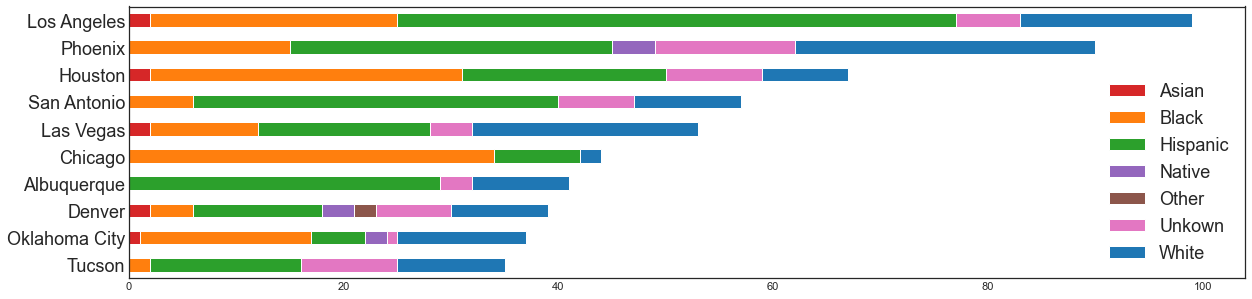

In [38]:
x = 10 #set the number of cities you want to visualize

dataframe = killings.iloc[:,:-1].tail(x) #data we want to plot, assigned to dataframe for readability

'''Stacked Horizontal Bar Chart'''
dataframe.plot.barh(x='city', stacked=True, figsize =(20, x/2), color=color_dict)


plt.yticks(size=18)
plt.ylabel(None)

plt.legend(fontsize=18)


plt.show()

## 3

## Fatal Shootings Race Index

In this section, the information about the killings will be combined with the demographic information contaied in the merged dataset, obtained in notebook 1 of the analysis.

The main goal is to calculate and show:
* an index that is --> people killed / 100k inhabitats.

It will be calculated an overall index and also a specific one for each race.

### 3.1

### Combination with demographc information

In [39]:
#import the dataset with demographic information (see notebook 1 )
df_dem = pd.read_csv('demographic_merged.csv')

#have coherent states names
df_dem.replace(states_dict, inplace = True)

df_dem.head(2)

,state,city,population,lat,lng,median_income,poverty_rate,percent_completed_hs,share_white,share_black,share_native_american,share_asian,share_hispanic
0,Alaska,Anchor Point,2057.0,59.7703,-151.7052,51591.0,10.1,93.8,90.2,0.3,3.8,0.9,2.2
1,Alaska,Anchorage,253421.0,61.1508,-149.1091,78326.0,8.2,93.0,66.0,5.6,7.9,8.1,7.6


In [40]:
#for the analysis we use only a subset of the features
subset = ['state', 'city', 'population', 'share_white', 'share_black', 
           'share_native_american', 'share_asian', 'share_hispanic']

df_dem_races = df_dem[subset].copy()


#in the new df, we calculate the effective number of people instead of the shares
columns = ['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']

df_dem_races[columns] = df_dem_races[columns].apply(lambda x: (x/100) * df_dem_races['population'] )


#proper names should be assigned
dict_population={}

pop_values = ['white_population', 'black_population', 'native_population', 'asian_population', 'hispanic_population']

for key, value in zip(columns, pop_values):
    dict_population[key] = value
    
dict_population['population'] = 'total_population'
    
    
df_dem_races.rename(columns=dict_population, inplace = True)
df_dem_races.head(2)

,state,city,total_population,white_population,black_population,native_population,asian_population,hispanic_population
0,Alaska,Anchor Point,2057.0,1855.414,6.171,78.166,18.513,45.254
1,Alaska,Anchorage,253421.0,167257.860,14191.576,20020.259,20527.101,19259.996


In [41]:
#merging the dataframe with 'killings'

df_dem_races = df_dem_races.merge(killings, on=['state', 'city'])
df_dem_races.head()

,state,city,total_population,white_population,black_population,native_population,asian_population,hispanic_population,Asian,Black,Hispanic,Native,Other,Unkown,White,total_killed
0,Alaska,Anchor Point,2057.0,1855.414,6.171,78.166,18.513,45.254,0,0,0,0,0,0,1,1
1,Alaska,Anchorage,253421.0,167257.860,14191.576,20020.259,20527.101,19259.996,1,1,0,1,0,2,6,11
2,Alaska,Barrow,4178.0,706.082,41.780,2556.936,380.198,129.518,0,0,0,1,0,0,0,1
3,Alaska,Big Lake,3136.0,2700.096,6.272,219.520,15.680,97.216,0,1,0,0,0,0,0,1
4,Alaska,Copper Center,397.0,181.429,0.000,192.545,1.191,11.910,1,0,0,0,0,0,0,1


In [42]:
#the following dictionary is used to rename the columns from 'Asian' to 'White'

dict_killed = {}
keys = color_dict.keys()

for key in keys:
    dict_killed[key] = str(key).lower() + 's_killed'

df_dem_races.rename(columns=dict_killed, inplace = True)
df_dem_races.head(2)

,state,city,total_population,white_population,black_population,native_population,asian_population,hispanic_population,asians_killed,blacks_killed,hispanics_killed,natives_killed,others_killed,unkowns_killed,whites_killed,total_killed
0,Alaska,Anchor Point,2057.0,1855.414,6.171,78.166,18.513,45.254,0,0,0,0,0,0,1,1
1,Alaska,Anchorage,253421.0,167257.860,14191.576,20020.259,20527.101,19259.996,1,1,0,1,0,2,6,11


The obtained dataframe contain information -at city level- about:
* number of inhabitants
* number of victims

Both in total and divided by race. From this, it is easy to calcluate the indexes.

### 3.2

### Index calcluation

In [43]:
'''Some introductory work should be done:

First: we create a list with the names of the columns that will contain the indexes.

Second: we recover two lists with the names of the columns needed for the calculation 
Note that the three lists must contain the "races" in the same order and number.

Moreover, we don't have demographic information about 'Unkown race' or 'Other race' for this reason those two
are kept out from the analysis.

'''

#indexes names
index = sorted(['black_index', 'asian_index', 'hispanic_index', 'native_index', 'white_index', 'total_index'])
print(index)

#list with '_killed' columns except 'others' and 'Unkowns'
k = list(dict_killed.values())
k.remove('others_killed')
k.remove('unkowns_killed')
k.append('total_killed')
k = sorted(k)
print(k)

#list with '_population columns
p = sorted(dict_population.values())
print(p)

'''All are sorted to be sure of having correspondance.'''


#creating an index, for each city, saying:
#how many people have been kileed by 100k inhabtants --> in total and by race

for i in range(len(index)):
    df_dem_races[index[i]] = 100000 * (df_dem_races[k[i]] / df_dem_races[p[i]])

df_dem_races = df_dem_races.sort_values(by='total_killed', ascending=False).reset_index(drop=True)
df_dem_races.head(2)

['asian_index', 'black_index', 'hispanic_index', 'native_index', 'total_index', 'white_index']
['asians_killed', 'blacks_killed', 'hispanics_killed', 'natives_killed', 'total_killed', 'whites_killed']
['asian_population', 'black_population', 'hispanic_population', 'native_population', 'total_population', 'white_population']


,state,city,total_population,white_population,black_population,native_population,asian_population,hispanic_population,asians_killed,blacks_killed,...,others_killed,unkowns_killed,whites_killed,total_killed,asian_index,black_index,hispanic_index,native_index,total_index,white_index
0,California,Los Angeles,12815475.0,6382106.550,1230285.600,89708.325,1448148.675,6215505.375,2,23,...,0,6,16,99,0.138107,1.869485,0.836617,0.000000,0.772504,0.250701
1,Arizona,Phoenix,4081849.0,2689938.491,265320.185,89800.678,130619.168,1665394.392,0,15,...,0,13,28,90,0.000000,5.653546,1.801375,4.454309,2.204883,1.040916


### 3.3

### Index Representation

#### 3.3.1

#### Cities Index Heatmap

The created indexes are shown with an heatmap.

In [44]:
'''To show indexes in the heatmap we need to keep a dataframe with only the created indexes
and the name of the cities as the dataframe index'''

heatmap_cities = df_dem_races.copy()
heatmap_cities.set_index('city', inplace =True)
heatmap_cities = heatmap_cities[index]

# shift column 'total_index' to first position
temp = heatmap_cities.pop('total_index')
heatmap_cities.insert(0, 'total_index', temp)

heatmap_cities.head(2)

,total_index,asian_index,black_index,hispanic_index,native_index,white_index
city,,,,,,
Los Angeles,0.772504,0.138107,1.869485,0.836617,0.000000,0.250701
Phoenix,2.204883,0.000000,5.653546,1.801375,4.454309,1.040916


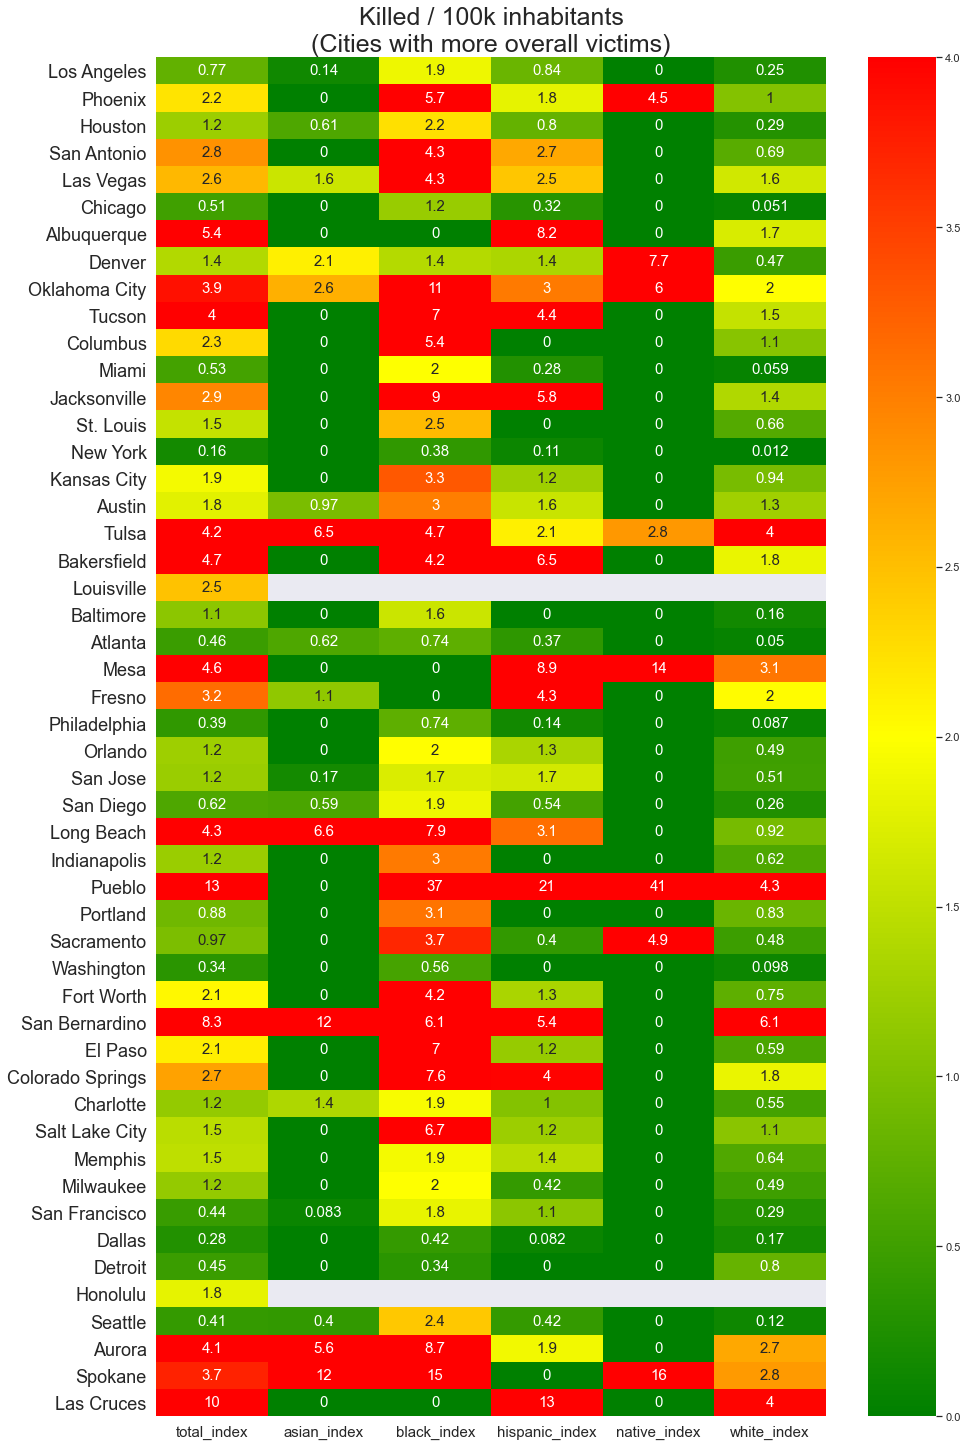

In [45]:
'''x = number of cities showed'''

x=50

#(green - yellow - red) map
traffic_light = colors.LinearSegmentedColormap.from_list('', ['green','yellow','red'])

sns.set(rc={'figure.figsize':(15,x/2)})
sns.heatmap(heatmap_cities.head(x), vmax=4, cmap = traffic_light, annot=True,  annot_kws={'fontsize':15})

plt.title('Killed / 100k inhabitants\n(Cities with more overall victims)', size=25)
plt.yticks(size=18)
plt.ylabel(None)
plt.xticks(size=15)
plt.show()

#### This heatmap clearly shows that:

* **whites** and **asians** are killed, proportionally, less than other races
* **blacks** have generally higher number of people killed per 100k people
* **hispanics** in some cities have similar number compared to blacks
* **natives** in many cities the index is 0, but in few cities is quite high. Indicating likely problems in those cities.

#### 3.3.2

#### States Index Heatmap

The same index is calculated for US states and showed.

In [46]:
'''Similar operations ar performed, but first aggregating data at
'State' level with groupby'''


df_states = df_dem_races.iloc[:,:-6].copy()
df_states = df_states.groupby(by='state').sum()
df_states = df_states.sort_values(by='total_killed', ascending=False).reset_index()

for i in range(len(index)):
    df_states[index[i]] = 100000 * (df_states[k[i]] / df_states[p[i]])

heatmap_states = df_states.drop(df_states.columns[1:-6], axis=1)

#shift column 'total_index' to first position
temp = heatmap_states.pop('total_index')
heatmap_states.insert(1, 'total_index', temp)  

heatmap_states = heatmap_states.set_index('state')
heatmap_states.head()

,total_index,asian_index,black_index,hispanic_index,native_index,white_index
state,,,,,,
California,1.857901,0.492727,4.119183,1.865515,0.951795,0.957803
Texas,2.175110,0.570563,2.660971,1.525968,0.558258,1.258990
Florida,1.829778,0.207737,3.414359,0.850315,0.000000,1.094961
Arizona,3.454167,0.000000,5.260471,3.431844,5.375416,1.976880
Colorado,3.600758,2.509848,4.546073,3.595385,6.947272,2.318179


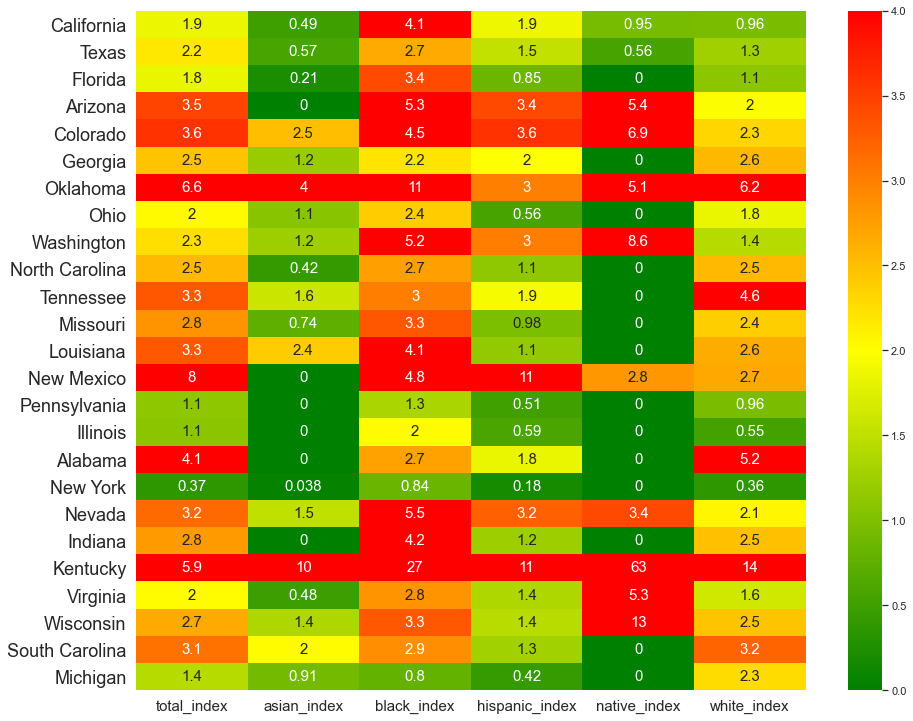

In [47]:
'''x = number of states showed'''
x=25

traffic_light = colors.LinearSegmentedColormap.from_list('', ['green','yellow','red'])

sns.set(rc={'figure.figsize':(15,x/2)})

sns.heatmap(heatmap_states.head(x), vmax=4, cmap = traffic_light, annot=True,  annot_kws={'fontsize':15})

plt.yticks(size=18)
plt.ylabel(None)
plt.xticks(size=15)
plt.show()

Similar considerations to whate done for cities can be done here.

### 3.4

### US Choropleth Map

The last visualization -**a choropleth map**- gives an idea where are located the states with the highest indexes.

In [48]:
#this json file contains information about the geography, location and shape of the states

gj = 'us-states.json'

#source: https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json

In [49]:
#defining a function needed to plot a choropleth map

def ch_map(gj, data, col, legend):
    
    #initialize the map with the location of the USA
    choropleth_map = folium.Map(location=[48, -102], zoom_start=3)
    
    #setting parameters of the choropleth map
    folium.Choropleth(
        geo_data=gj,
        name='choropleth',
        data=data,
        columns=['state', col],
        key_on='feature.properties.name', 
        fill_color='OrRd',
        fill_opacity=1,
        line_opacity=1,
        legend_name=legend,
    ).add_to(choropleth_map)

    return(choropleth_map)

In [50]:
#needed for the map
choropleth_df = heatmap_states.reset_index().copy()
choropleth_df.head(2)

,state,total_index,asian_index,black_index,hispanic_index,native_index,white_index
0,California,1.857901,0.492727,4.119183,1.865515,0.951795,0.957803
1,Texas,2.175110,0.570563,2.660971,1.525968,0.558258,1.258990


In [51]:
'''
To see indexes for other races just pass to the function the corresponding index.
'''

ch_map(gj, choropleth_df, 'total_index', 'Total People Killed per 100k people')

## 4

## Conclusions

This analysis shows cleraly that **minorities have been killed by police, proportionally more than white people.**

So, a legitimate question emerges: **Is there a problem of racism in US police?**